In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

Just checking the data of one stock as of now

In [11]:
HDFC_df = pd.read_csv("D:\Study\Project\Stocks-Visualizing-and-Analysis\HDFCBANK.NS.csv")
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-11-05,316.000000,318.000000,315.375000,317.500000,296.126587,2011064.0
1,2012-11-06,316.975006,320.600006,316.975006,319.774994,298.248474,3639042.0
2,2012-11-07,319.875000,322.500000,318.450012,320.024994,298.481598,4100330.0
3,2012-11-08,318.250000,320.500000,317.750000,319.500000,297.991974,1933900.0
4,2012-11-09,319.125000,321.500000,317.500000,319.674988,298.155212,2210388.0


In [12]:
#as the data is too big. i am rounding of the data aftdr decimals.
HDFC_df = HDFC_df.round(2)
HDFC_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-11-05,316.00,318.0,315.38,317.50,296.13,2011064.0
1,2012-11-06,316.98,320.6,316.98,319.77,298.25,3639042.0


In [13]:
#here is checked the size of data
HDFC_df.shape

(2469, 7)

In [14]:
#here checking if there is any null values in the dataset
HDFC_df.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

in the output of null values we found that there is not null value in the dataset

In [15]:
#lets check the datatypes of each the column
HDFC_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [16]:
#here we can see that data is in object format. pandas has inbuilt functions for data but the data should be in type ‘datetime64(ns)’
HDFC_df['Date'] = pd.to_datetime(HDFC_df['Date'])
HDFC_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-11-05,316.00,318.0,315.38,317.50,296.13,2011064.0
1,2012-11-06,316.98,320.6,316.98,319.77,298.25,3639042.0


In [17]:
HDFC_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

here we can see that the datatype of the data column changed to datetime64[ns]

In [18]:
#here we can check total duration of analysis
HDFC_df['Date'].max()-HDFC_df['Date'].min()

Timedelta('3651 days 00:00:00')

In [19]:
#describe function in pandas is used to get the descriptive data from the data. and with that i have used to astype to change the data from the float to the int.
HDFC_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,1437,1450,1427,1439,1439,6339650
std,52,52,52,53,53,1783216
min,1331,1350,1330,1343,1343,1083897
25%,1397,1407,1386,1396,1396,5095216
50%,1441,1457,1429,1445,1445,6214595
75%,1484,1490,1473,1485,1485,7333040
max,1530,1540,1512,1528,1528,11201568


In [20]:
#to set the date column to index in dataframe to make the plotting easy
HDFC_df.index = HDFC_df['Date']

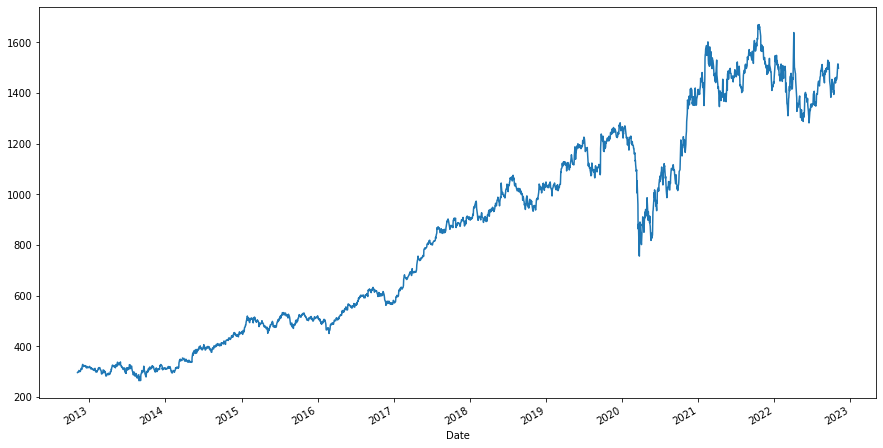

In [21]:
HDFC_df['Adj Close'].plot(figsize = (15,8))
plt.show()

In [22]:
from dash import Dash, dcc, html , Output

In [23]:
import plotly.offline as pyo
import plotly.graph_objs as go

Y = HDFC_df['Adj Close']
X = HDFC_df['Date']

plot_data=[go.Scatter(x=X, y=Y, mode='markers')]

plot_layout= go.Layout(title = 'My first')
fig = go.Figure(data=plot_data, layout= plot_layout)

In [24]:
fig.show()

Day to Day percentage change 

What does daily percentage means?

So if the stock opening prie is 100rs and the stock closes as 150rs. So the percentage change here is 50%

In [25]:
HDFC_df['Day_Perc_Change'] = HDFC_df['Adj Close'].pct_change()*100
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2012-11-05,2012-11-05,316.00,318.0,315.38,317.50,296.13,2011064.0,NaN
2012-11-06,2012-11-06,316.98,320.6,316.98,319.77,298.25,3639042.0,0.715902
2012-11-07,2012-11-07,319.88,322.5,318.45,320.02,298.48,4100330.0,0.077117
2012-11-08,2012-11-08,318.25,320.5,317.75,319.50,297.99,1933900.0,-0.164165
2012-11-09,2012-11-09,319.12,321.5,317.50,319.67,298.16,2210388.0,0.057049


In [26]:
HDFC_df.dropna(axis = 0, inplace = True)

<AxesSubplot: xlabel='Date'>

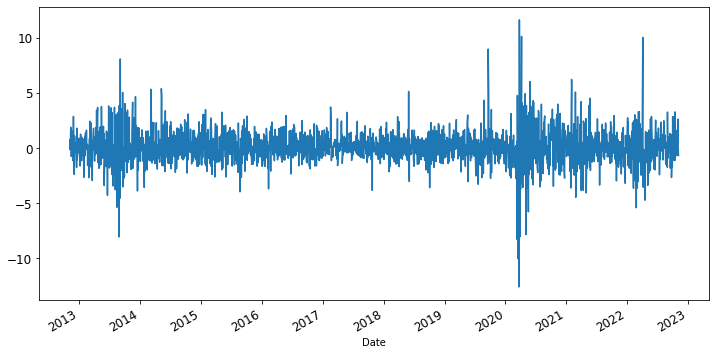

In [31]:
HDFC_df['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

In [32]:
X = HDFC_df['Date']
Y = HDFC_df['Day_Perc_Change']

plot_data=[go.Scatter(x=X, y=Y, mode='markers')]

plot_layout= go.Layout(title = 'Percentage change graph')
fig = go.Figure(data=plot_data, layout= plot_layout)
fig.show()

I observed here that the mostly the spike is between the -2% and 2% and there are some few spikes between 10 to -10 percent on both the sides.

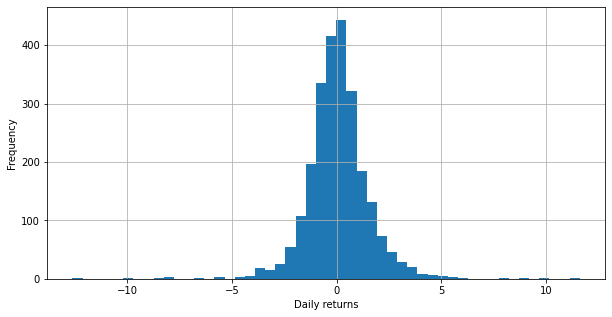

count    2465.000000
mean        0.076931
std         1.495275
min       -12.606164
25%        -0.688919
50%         0.030462
75%         0.788624
max        11.598576
Name: Day_Perc_Change, dtype: float64

In [33]:
HDFC_df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()#satistics
HDFC_df.Day_Perc_Change.describe()

Trend Analysis

Here we will make a function to define the trend. Will do it with the if  else statements.